<a href="https://colab.research.google.com/github/pd8459/Convolution-Neural-Network/blob/main/Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
device= torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
import torchvision.datasets as datatsets

trnas = transforms.Compose([transforms.ToTensor()])

data_root = './data'
train_set = datatsets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = trnas
)
test_set = datatsets.CIFAR10(
    root = data_root, train = False,
    download = True, transform = trnas
)


In [ ]:
len(train_set)

50000

In [ ]:
len(test_set)

10000

In [ ]:
classes = train_set.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
len(classes)

10

In [ ]:
batch_size = 128

train_loader = DataLoader(
    train_set, batch_size = batch_size,
    shuffle = True
)

test_loader = DataLoader(
    test_set, batch_size = batch_size,
    shuffle = False
)

for images, labels in train_loader:
  break

print(images.shape)
print(labels.shape)




torch.Size([128, 3, 32, 32])
torch.Size([128])


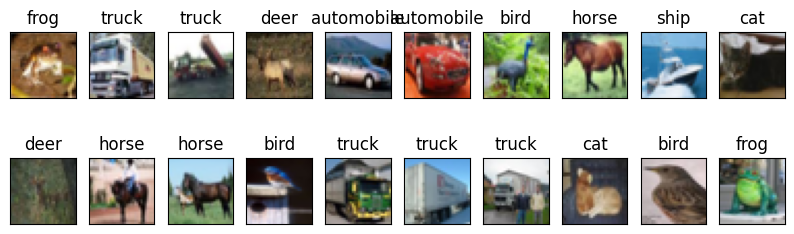

In [ ]:


plt.figure(figsize=(10,3))
for i in range(20):
  ax = plt.subplot(2,10,i+1)

  image, label = train_set[i]

  plt.imshow(np.transpose(image,(1,2,0)))
  ax.set_title(f'{classes[label]}')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
class CNN1(nn.Module):
  def __init__(self):
    super(CNN1, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.l1 = nn.Linear(in_features=32*16*16, out_features=50)
    self.l2 = nn.Linear(in_features=50, out_features=10)

    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.layer1(x)

    x = x.view(x.size(0),-1)

    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)

    return x

In [ ]:
torch.cuda.manual_seed(123)

model = CNN1()
model.to(device)
lr = 1e-3

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= lr)
history = np.zeros((0,5))




In [ ]:
num_epochs = 50

from tqdm.notebook import tqdm
for epoch in range(num_epochs):
  train_acc, train_loss = 0,0
  test_acc, test_loss = 0,0
  n_train, n_test = 0,0

  for images, labels in tqdm(train_loader):
    n_train += len(labels)

    inputs = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss_model = criterion(outputs, labels)
    loss_model.backward()
    optimizer.step()
    pred = outputs.max(axis=1)[1]
    train_loss += loss_model.item()
    train_acc += (pred == labels).sum().item()


  for images_test, labels_test in test_loader:
      n_test += len(labels_test)

      inputs_test = images_test.to(device)
      labels_test = labels_test.to(device)

      outputs_test = model(inputs_test)

      loss_test_model = criterion(outputs_test, labels_test)

      pred_test = outputs_test.max(axis=1)[1]

      test_loss+= loss_test_model.item()
      test_acc += (pred_test == labels_test).sum().item()

  train_acc = train_acc / n_train
  test_acc = test_acc / n_test
  train_loss = train_loss / n_train
  test_loss = test_loss / n_test
  print(f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f}, loss_test: {test_loss:.5f}')
  item = np.array([epoch+1, train_loss,train_acc, test_loss, test_acc])
  history = np.vstack((history,item))

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.00549, loss_test: 0.00937


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.00546, loss_test: 0.00957


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.00542, loss_test: 0.00939


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.00537, loss_test: 0.00955


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.00529, loss_test: 0.00940


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.00527, loss_test: 0.00946


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.00529, loss_test: 0.00979


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.00522, loss_test: 0.00971


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.00515, loss_test: 0.00955


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.00515, loss_test: 0.01029


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.00509, loss_test: 0.00982


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.00510, loss_test: 0.00975


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.00505, loss_test: 0.00986


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.00501, loss_test: 0.00994


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.00498, loss_test: 0.01030


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.00499, loss_test: 0.01000


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.00489, loss_test: 0.01030


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.00496, loss_test: 0.01025


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.00483, loss_test: 0.01043


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.00479, loss_test: 0.01034


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.00478, loss_test: 0.01037


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.00476, loss_test: 0.01055


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.00473, loss_test: 0.01059


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.00475, loss_test: 0.01058


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.00466, loss_test: 0.01056


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.00465, loss_test: 0.01096


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.00463, loss_test: 0.01064


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.00463, loss_test: 0.01068


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.00454, loss_test: 0.01086


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.00456, loss_test: 0.01111


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.00456, loss_test: 0.01110


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.00455, loss_test: 0.01103


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.00448, loss_test: 0.01110


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.00442, loss_test: 0.01110


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.00439, loss_test: 0.01118


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.00444, loss_test: 0.01129


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.00437, loss_test: 0.01126


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.00437, loss_test: 0.01150


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.00434, loss_test: 0.01143


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.00431, loss_test: 0.01158


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.00433, loss_test: 0.01141


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.00422, loss_test: 0.01153


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.00420, loss_test: 0.01200


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.00419, loss_test: 0.01173


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.00416, loss_test: 0.01189


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.00416, loss_test: 0.01180


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.00416, loss_test: 0.01187


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.00408, loss_test: 0.01239


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.00406, loss_test: 0.01241


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.00406, loss_test: 0.01204


In [ ]:
history

array([[1.00000000e+00, 1.42329170e-02, 3.42780000e-01, 1.25098732e-02,
        4.21800000e-01],
       [2.00000000e+00, 1.17606992e-02, 4.54280000e-01, 1.13234439e-02,
        4.76100000e-01],
       [3.00000000e+00, 1.07828621e-02, 4.99060000e-01, 1.07262813e-02,
        5.10200000e-01],
       [4.00000000e+00, 1.02077199e-02, 5.27300000e-01, 1.01043705e-02,
        5.32500000e-01],
       [5.00000000e+00, 9.74913855e-03, 5.49660000e-01, 1.01030388e-02,
        5.34900000e-01],
       [6.00000000e+00, 9.37290313e-03, 5.65580000e-01, 9.54177392e-03,
        5.67900000e-01],
       [7.00000000e+00, 9.12821713e-03, 5.77740000e-01, 9.46247786e-03,
        5.74200000e-01],
       [8.00000000e+00, 8.89712822e-03, 5.92340000e-01, 9.20647945e-03,
        5.85200000e-01],
       [9.00000000e+00, 8.66769243e-03, 6.01620000e-01, 9.30235058e-03,
        5.75000000e-01],
       [1.00000000e+01, 8.46407426e-03, 6.11680000e-01, 9.20141255e-03,
        5.88500000e-01],
       [1.10000000e+01, 8.2979

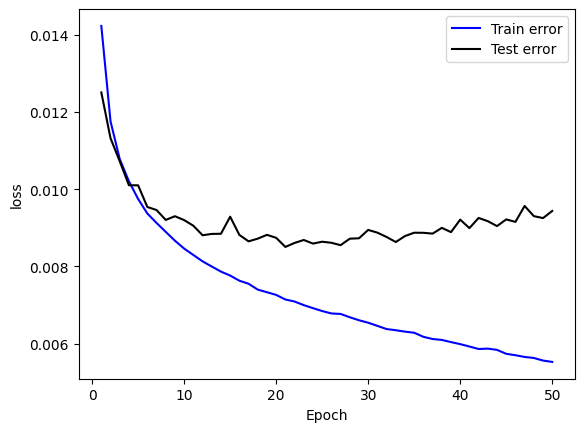

In [ ]:
plt.plot(history[:,0], history[:,1], 'b', label = 'Train error')
plt.plot(history[:,0], history[:,3], 'k', label = 'Test error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

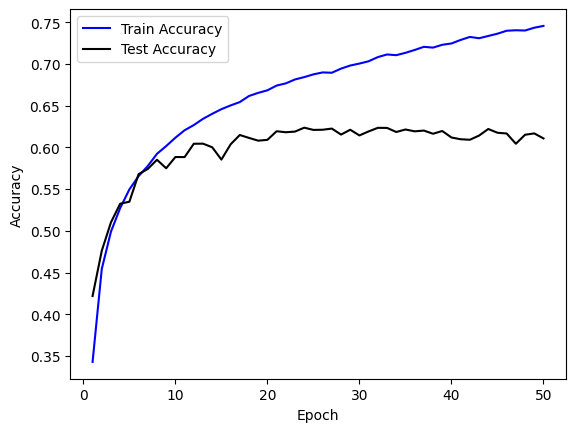

In [ ]:
plt.plot(history[:,0], history[:,2], 'b', label='Train Accuracy')
plt.plot(history[:,0], history[:,4], 'k', label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
class CNN1(nn.Module):
  def __int__(self):
    super(CNN1, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_chaannels=3, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)

    )
    self.l1 = nn.Linear(in_features=128*4*4, out_features=50)
    self.l2 = nn.Linear(in_features=50, out_features=10)

    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.5)

  def forward(self, x):
    x = self.layer1(x)

    x = x.view(x.size(0),-1)

    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)

    return x


In [ ]:
class CNN1(nn.Module):
  def __int__(self):
    super(CNN1, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_chaannels=3, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0,2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0,3),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0,4)

    )
    self.l1 = nn.Linear(in_features=128*4*4, out_features=128)
    self.l2 = nn.Linear(in_features=128, out_features=10)

    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0,4)

  def forward(self, x):
    x = self.layer1(x)

    x = x.view(x.size(0),-1)

    x = self.l1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.l2(x)

    return x


In [ ]:
class CNN1(nn.Module):
  def __int__(self):
    super(CNN1, self).__init__()

    self.bn1 = nn.BatchNorm2d(32)
    self.bn2 = nn.BatchNorm2d(32)
    self.bn3 = nn.BatchNorm2d(64)
    self.bn4 = nn.BatchNorm2d(64)
    self.bn5 = nn.BatchNorm2d(128)
    self.bn6 = nn.BatchNorm2d(128)

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_chaannels=3, out_channels=32, kernel_size=3, padding=1),
        self.bn1,
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
        self.bn2,
        nn.ReLU,
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0,2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        self.bn3,
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        self.bn4,
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0,3),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        self.bn5,
        nn.ReLU(),
        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
        self.bn6,
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0,4)

    )
    self.l1 = nn.Linear(in_features=128*4*4, out_features=128)
    self.l2 = nn.Linear(in_features=128, out_features=10)

    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0,4)

  def forward(self, x):
    x = self.layer1(x)

    x = x.view(x.size(0),-1)

    x = self.l1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.l2(x)

    return x


In [ ]:
plt.plot(history[:,0], history[:,1], 'b', label = 'Train error')
plt.plot(history[:,0], history[:,3], 'k', label = 'Test error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history[:,0], history[:,2], 'b', label='Train Accuracy')
plt.plot(history[:,0], history[:,4], 'k', label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:



trans = transforms.Compose([transforms.ToTensor()])

data_root = '/data'
train_set = datatsets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = trans
)


In [ ]:



trans = transforms.Compose([transforms.ToTensor(),
                            transforms.RandomHorizontalFlip(p=0.5)])

data_root = '/data'
train_set = datatsets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = trans
)


In [ ]:



trans = transforms.Compose([transforms.ToTensor(),
                            transforms.RandomVerticalFlip(p=0.5)])

data_root = '/data'
train_set = datatsets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = trans
)


In [ ]:



trans = transforms.Compose([transforms.ToTensor(),
                            transforms.RandomErasing(p=0.5, scale=(0.02,0,33),ratio=(0.5,2))])

data_root = '/data'
train_set = datatsets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = trans
)


In [ ]:



trans = transforms.Compose([transforms.ToTensor(),
                            transforms.RandomResizedCrop((32,32), scale=(0,1,1),ratio=(0.5,2))])

data_root = '/data'
train_set = datatsets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = trans
)


In [ ]:



trans = transforms.Compose([transforms.ToTensor(),
                            transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)])

data_root = '/data'
train_set = datatsets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = trans
)


In [ ]:



trans = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize(0.5,0,5),
                            transforms.RandomHorizontalFlip(p=0.5),
                            transforms.RandomErasing(p=0.5, scalse=(0.02, 0.33), ratio=(0.3,3.3))])

data_root = '/data'
train_set = datatsets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = trans
)
